# Compute performance metrics for the given Y and Y_score without sklearn

In [29]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use 
numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, 
<a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> 
Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [131]:
df_a=pd.read_csv('5_a.csv')
df_a.head(10)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199
5,1.0,0.601600
6,1.0,0.666323
7,1.0,0.567012
8,1.0,0.650230
9,1.0,0.829346


In [132]:
# write your code here for task A

df_a.value_counts(df_a['y'])

y
1.0    10000
0.0      100
Name: count, dtype: int64

In [133]:
df_a["y'"] = df_a['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)

In [67]:
def myconfusion_matrix(y_actual, y_pred):
    """
    Simple confusion matrix implementation only
    works on integer values for multi classes
    """
    num_classes = len(set(y_actual)) # to get the num of unique elements

    # construct a zero matrix with size of classes
    cf_mat = np.array(np.zeros((num_classes, num_classes), dtype=int))
    
    assert len(y_actual) == len(y_pred), "Actual and predicted values should be of the same length"
    
    # loop through both actual and predicted
    # https://stackoverflow.com/questions/61193476/constructing-a-confusion-matrix-from-data-without-sklearn
    for actual, pred in zip(y_actual, y_pred):
        # confusion matrix is just a matrix with x, y values
        # we take the actual as x (row) axis and 
        # pred as y (column) axis and increment the value
        cf_mat[int(actual), int(pred)] +=1
    # print('------------')
    # print('| TN  | FP |')
    # print('------------')
    # print('| FN  | TP |')
    # print('------------')
    return cf_mat

In [84]:
myconfusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])

array([[0, 2],
       [1, 1]])

In [90]:
def fOne_score(y_actual, y_pred):
    """
    Simple f1 score calculator for binary
    classes only
    Future work https://stats.stackexchange.com/questions/179835/how-to-build-a-confusion-matrix-for-a-multiclass-classifier
    """
    conf_mat = myconfusion_matrix(y_actual, y_pred)
    tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]
    # print(tp, fp, fn, tn)
    # precision = true positive /(true positive + false positive)
    # recall = true positive /(true positive + false negative)
    
    precision =  tp /(tp + fp)
    recall =  tp /(tp + fn)
    # print(precision, recall)
    # f one score = (2 x Precision x Recall) / (Precision + Recall)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

In [91]:
fOne_score(df_a['y'].tolist(), df_a["y'"].tolist())

0.9950248756218906

In [103]:
def calc_tpr_fpr(tp, fp, tn, fn):
    #calculate true positive rate
    # true positive rate -> true positives / true positives + false negatives
    tpr = tp / (tp + fn)
    # false positive rate -> false positives / false positives + true negatives
    fpr = fp / (fp + tn)

    return tpr, fpr

In [138]:
tpr_arr = []
fpr_arr = []

for i in np.arange(0, 1, 0.1):
    df_a[f"{i}-y'"] = df_a['proba'].apply(lambda x: 0.0 if x < i else 1.0)
    conf_mat = myconfusion_matrix(df_a['y'].tolist(), df_a[f"{i}-y'"].tolist())
    tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]
    tpr, fpr = calc_tpr_fpr(tp, fp, tn, fn)
    print(tpr, fpr, i)
    tpr_arr.append(tpr)
    fpr_arr.append(fpr)
    

1.0 1.0 0.0
1.0 1.0 0.1
1.0 1.0 0.2
1.0 1.0 0.30000000000000004
1.0 1.0 0.4
1.0 1.0 0.5
0.7509 0.78 0.6000000000000001
0.4912 0.49 0.7000000000000001
0.234 0.25 0.8
0.0 0.0 0.9


In [118]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'True positive rate')

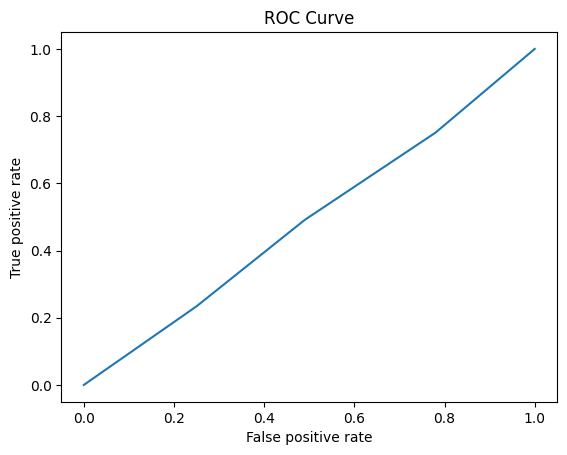

In [124]:
plt.plot(fpr_arr, tpr_arr)
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [139]:
auc = np.trapz(tpr_arr, fpr_arr)
print(auc)

-0.48897750000000006


In [140]:

df_a[f"0.52-y'"] = df_a['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)
conf_mat = myconfusion_matrix(df_a['y'].tolist(), df_a[f"0.52-y'"].tolist())
tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]

In [142]:
accuracy_score = (tp+tn)/(tp + fp + fn + tn)
print(accuracy_score)


0.9900990099009901




## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use      
numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, 
<a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_b=pd.read_csv('5_b.csv')
df_b.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [4]:
# write your code here for task B
df_b.value_counts(df_b['y'])

y
0.0    10000
1.0      100
Name: count, dtype: int64

In [5]:
df_b["y'"] = df_b['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)

In [6]:
def myconfusion_matrix(y_actual, y_pred):
    """
    Simple confusion matrix implementation only
    works on integer values for multi classes
    """
    num_classes = len(set(y_actual)) # to get the num of unique elements

    # construct a zero matrix with size of classes
    cf_mat = np.array(np.zeros((num_classes, num_classes), dtype=int))
    
    assert len(y_actual) == len(y_pred), "Actual and predicted values should be of the same length"
    
    # loop through both actual and predicted
    # https://stackoverflow.com/questions/61193476/constructing-a-confusion-matrix-from-data-without-sklearn
    for actual, pred in zip(y_actual, y_pred):
        # confusion matrix is just a matrix with x, y values
        # we take the actual as x (row) axis and 
        # pred as y (column) axis and increment the value
        cf_mat[int(actual), int(pred)] +=1
    # print('------------')
    # print('| TN  | FP |')
    # print('------------')
    # print('| FN  | TP |')
    # print('------------')
    return cf_mat

In [7]:
myconfusion_matrix(df_b['y'].tolist(), df_b["y'"].tolist())

array([[9761,  239],
       [  45,   55]])

In [9]:
def fOne_score(y_actual, y_pred):
    """
    Simple f1 score calculator for binary
    classes only
    Future work https://stats.stackexchange.com/questions/179835/how-to-build-a-confusion-matrix-for-a-multiclass-classifier
    """
    conf_mat = myconfusion_matrix(y_actual, y_pred)
    tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]
    # print(tp, fp, fn, tn)
    # precision = true positive /(true positive + false positive)
    # recall = true positive /(true positive + false negative)
    
    precision =  tp /(tp + fp)
    recall =  tp /(tp + fn)
    # print(precision, recall)
    # f one score = (2 x Precision x Recall) / (Precision + Recall)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

In [10]:
fOne_score(df_b['y'].tolist(), df_b["y'"].tolist())

0.2791878172588833

In [8]:
def calc_tpr_fpr(tp, fp, tn, fn):
    #calculate true positive rate
    # true positive rate -> true positives / true positives + false negatives
    tpr = tp / (tp + fn)
    # false positive rate -> false positives / false positives + true negatives
    fpr = fp / (fp + tn)

    return tpr, fpr

In [11]:
tpr_arr = []
fpr_arr = []

for i in np.arange(0, 1, 0.1):
    df_b[f"{i}-y'"] = df_b['proba'].apply(lambda x: 0.0 if x < i else 1.0)
    conf_mat = myconfusion_matrix(df_b['y'].tolist(), df_b[f"{i}-y'"].tolist())
    tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]
    tpr, fpr = calc_tpr_fpr(tp, fp, tn, fn)
    print(tpr, fpr, i)
    tpr_arr.append(tpr)
    fpr_arr.append(fpr)
    

1.0 1.0 0.0
1.0 1.0 0.1
1.0 0.7497 0.2
1.0 0.5032 0.30000000000000004
1.0 0.2683 0.4
0.55 0.0239 0.5
0.0 0.0 0.6000000000000001
0.0 0.0 0.7000000000000001
0.0 0.0 0.8
0.0 0.0 0.9


In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'True positive rate')

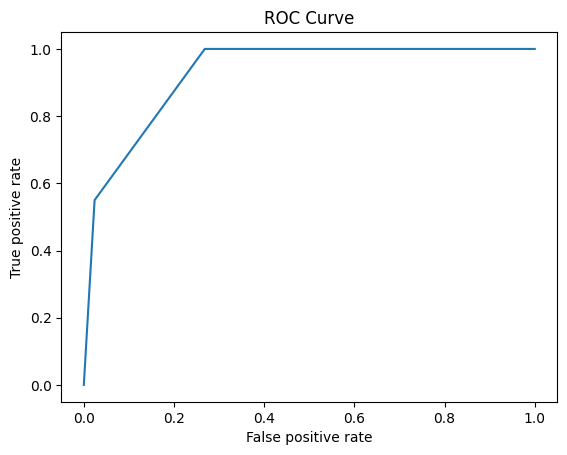

In [13]:
plt.plot(fpr_arr, tpr_arr)
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

In [14]:
auc = np.trapz(tpr_arr, fpr_arr)
print(auc)

-0.9276825


In [16]:

df_b[f"0.52-y'"] = df_b['proba'].apply(lambda x: 0.0 if x < 0.5 else 1.0)
conf_mat = myconfusion_matrix(df_b['y'].tolist(), df_b[f"0.52-y'"].tolist())
tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]

In [17]:
accuracy_score = (tp+tn)/(tp + fp + fn + tn)
print(accuracy_score)


0.9718811881188119


### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: 
$y^{pred}= \text{[0 if y-score < threshold  else 1]}$
</br>
$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [18]:
df_c=pd.read_csv('5_c.csv')
df_c.head()

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [35]:
 # write your code for task C

 def calculate_metric_A(data):
   metric_A_dict = {}
   for threshold in np.arange(0, 1, 0.1):
      data[f"{threshold}-y'"] = data['prob'].apply(lambda x: 0.0 if x < threshold else 1.0)
      conf_mat = myconfusion_matrix(data['y'].tolist(), data[f"{threshold}-y'"].tolist())
      tp, fp, fn, tn = conf_mat[1, 1], conf_mat[0, 1], conf_mat[1, 0], conf_mat[0, 0]
      metric_A = (500 * fn) + (100 * fp)
      metric_A_dict[threshold] = metric_A
   
   return metric_A_dict

In [36]:
thresholds = calculate_metric_A(df_c)

In [42]:
best_threshold = sorted(thresholds.items(), key=lambda x:x[1])
print(f"Best threshold for lowest value of Metric A: (prob value: {best_threshold[0][0]}, metric_a: {best_threshold[0][1]})")

Best threshold for lowest value of Metric A: (prob value: 0.2, metric_a: 147200)



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_d=pd.read_csv('5_d.csv')
df_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [3]:
 # write your code for task 5d

 def mean_squared_error(y_actual, y_pred):
    mse = []
    for i in range(len(y_actual)):
        squared_error = (y_actual[i] - y_pred[i]) ** 2
        mse.append(squared_error)
    return round(np.mean(mse), 3)

In [4]:
mean_squared_error(df_d['y'].tolist(), df_d['pred'].tolist())

177.167

In [5]:
def mean_absolute_percentage_error(y_actual, y_pred):
    mape = []
    try:
        for i in range(len(y_actual)):
            absolute_error = abs((y_actual[i] - y_pred[i]) / y_actual[i])
            mape.append(absolute_error)
    except ZeroDivisionError:
        # print(y_actual[i], y_pred[i], i)
        pass

    return round(np.mean(mape), 3)

In [7]:
mean_absolute_percentage_error(df_d['y'].tolist(), df_d['pred'].tolist())

0.235

In [8]:
def r_square_error(y_actual, y_pred):
    y_mean = np.mean(y_actual)
    sum_of_squares = 0
    sum_of_residuals = 0
    try:
        for i in range(len(y_actual)):
            sum_of_squares += (y_actual[i] - y_mean) ** 2
            sum_of_residuals += (y_actual[i] - y_pred[i]) ** 2
            rse = 1 - (sum_of_residuals/sum_of_squares)
    except ZeroDivisionError:
        # print(y_actual[i], y_pred[i], i)
        pass

    return rse

In [9]:
r_square_error(df_d['y'].tolist(), df_d['pred'].tolist())

0.9563580007792891